In [1]:
import pandas as pd
import numpy as np

In [2]:
def theFunction(p,q,n):
    return p+np.random.rand(n)*(q-p)
theFunction(1,5,3)# from 1 to 5 generate 3 numbers

array([4.1805432 , 3.61416255, 3.45865165])

In [3]:
def getCropData(cropName,phmin,phmax,tempmin,tempmax,altmin,altmax,rfmin,rfmax,samplesize=30):
    
    crop= np.repeat(cropName,samplesize).reshape(samplesize,1)
    #ph 0-14
    ph = theFunction(phmin,phmax,samplesize)
    ph=ph.reshape(samplesize,1)   
    ph=np.round(ph,decimals=2) #rounding to 2 decimal places
    #temperature in degree celcius
    temp = np.round(theFunction(tempmin,tempmax,samplesize).reshape(samplesize,1),2)
    altitude = np.round(theFunction(altmin,altmax,samplesize).reshape(samplesize,1),2)
    rainfall = np.round(theFunction(rfmin,rfmax,samplesize).reshape(samplesize,1),2)
    #ph temp altitude rainfall crop
    return np.concatenate([ph,temp,altitude,rainfall,crop],axis=1)

In [4]:
pd.DataFrame(getCropData('RICE',5,6,25,30,0,3000,100,200,10),columns=['ph','temp','altitude','rainfall','crop'])

,ph,temp,altitude,rainfall,crop
0,5.86,26.14,2285.45,110.52,RICE
1,5.86,26.12,2235.28,183.12,RICE
2,5.48,26.73,1703.03,198.55,RICE
3,5.82,29.88,2257.29,142.93,RICE
4,5.14,28.93,2651.35,139.43,RICE
5,5.51,28.0,2241.2,162.99,RICE
6,5.07,28.46,2032.09,154.18,RICE
7,5.03,29.62,2619.23,147.8,RICE
8,5.48,29.65,2860.45,173.29,RICE
9,5.45,29.51,2877.97,142.25,RICE


In [92]:
#cropName,phmin,phmax,tempmin,tempmax,altmin,altmax,rfmin,rfmax,samplesize=30
#ricedata=getCropData('RICE',5,6,25,30,0,3000,100,200,200)

maizedata = getCropData('MAIZE',5.5,7,25,30,0,2200,600,900,1000)
paddydata = getCropData('PADDY',6,7,20,25,0,3000,25,150,1000)
milletdata = getCropData('MILLET',5,6,15,20,0,2100,450,650,1000)
barleydata = getCropData('BARLEY',6,7.5,15,17,0.2000,390,430,1000)
cerealsdata = getCropData('CEREAL',5.5,6.5,21,24,1600,2600,200,300 )
oilseeddata=getCropData('OILSEED',4.5,8,18,24,0,2400,25,500)
potatodata=getCropData('POTATO',4.8,5.5,12,25,1500,4200,500,700)
jutedata=getCropData('JUTE',4.8,5.8,24,38,0,1000,800,1000)
pulsedata=getCropData('PULSE',4.5,6.5,20,35,0,2400,100,400)
tobaccodata=getCropData('TOBACCO',5.8,6.5,24,27,0,2000,500,1250)
sugarcanedata=getCropData('SUGARCANE',5,8.5,15,45,0,1000,500,800)
cottondata=getCropData('COTTON',6,6.5,18,30,0,2100,500,700)
cardamomdata=getCropData('CARDAMOM',5.5,6.5,30,80,600,1200,1500,2150)
beandata=getCropData('BEAN',6,6.5,14,32,1000,2100,200,400)
mustarddata=getCropData('MUSTARD',5,5.7,7,25,0,3000,625,1000)


data=np.concatenate([maizedata,paddydata,milletdata,barleydata,cerealsdata,oilseeddata,potatodata,jutedata,pulsedata,tobaccodata,sugarcanedata,cottondata,cardamomdata,beandata,mustarddata],axis=0)

np.random.shuffle(data)
df=pd.DataFrame(data,columns=['ph','temp','altitude','rainfall','crop'])
df.to_csv('crops.csv')

In [93]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [94]:
#shaping features and target and splitting data into training and testing sets 
X = data[:,0:4:1] # start:stop:stepsize
Y = data[:,4:]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.5)

In [95]:
from sklearn.linear_model import LogisticRegression
lrmodel=LogisticRegression(max_iter=2000)

In [112]:
lrmodel.fit(x_train,y_train)

/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [121]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
def setParams(c=1.0,iter=1000):
    score=cross_val_score(LogisticRegression(C=c),X.astype(np.float64),Y)
    print(score)
    plt.scatter(c,score[2])

/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarn

[0.80124777 0.80428954 0.80875782]


/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarn

[0.86987522 0.86952636 0.86773905]


/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarn

[0.8885918  0.89097408 0.89097408]


/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarn

[0.89572193 0.89901698 0.89812332]


/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarn

[0.90285205 0.90080429 0.90348525]


/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarn

[0.90285205 0.90437891 0.90348525]


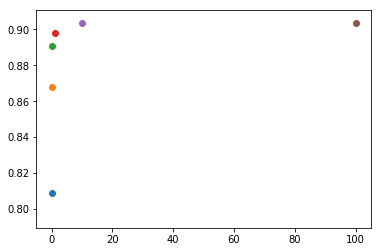

In [122]:
clist=[0.001,0.01,0.1,1,10,100]
for c in clist:
    setParams(c)

In [106]:
lrmodel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [107]:
linearRegressionScore=lrmodel.score(x_test.astype(np.float64),y_test)
linearRegressionScore

0.8904761904761904

In [98]:
lrmodel.classes_

array(['BARLEY', 'BEAN', 'CARDAMOM', 'CEREAL', 'COTTON', 'JUTE', 'MAIZE',
       'MILLET', 'MUSTARD', 'OILSEED', 'PADDY', 'POTATO', 'PULSE',
       'SUGARCANE', 'TOBACCO'], dtype='<U32')

In [99]:
def giveSuggestions(features,model,numberOfSuggestions=3):
    predictProbabilities=model.predict_proba([features.astype(np.float64)]) 
    indeces=predictProbabilities[0].argsort()[-numberOfSuggestions:][::-1]
    print("Suggestions in decresing of their priorities",indeces)
    print(model.predict([features.astype(np.float64)]))
    for i in range(len(indeces)):
        print(i," : ",model.classes_[indeces[i]]," ")


In [100]:
#giveSuggestions(features,trainedModel, no of suggestions of crops from best crops to leat favourable crop)
giveSuggestions(x_test[10],lrmodel,4)
print("\n\n FOR DEBUGGING --Y_TEST VALUE =>",y_test[10])

Suggestions in decresing of their priorities [ 6  2 14  5]
['MAIZE']
0  :  MAIZE  
1  :  CARDAMOM  
2  :  TOBACCO  
3  :  JUTE  


 FOR DEBUGGING --Y_TEST VALUE => ['JUTE']


In [14]:
#!pip install --user --upgrade git+https://github.com/jpmml/sklearn2pmml.git

In [71]:
from sklearn.externals import joblib

In [110]:
#exporting the trained model
joblib.dump(lrmodel, 'model.joblib', compress=9)



['model.joblib']

In [111]:
lrmodel.class_weight

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lrmodel.predict(x_test.astype(np.float64))))

              precision    recall  f1-score   support

      BARLEY       0.00      0.00      0.00        17
        BEAN       0.00      0.00      0.00        18
    CARDAMOM       0.00      0.00      0.00        15
      CEREAL       0.00      0.00      0.00        12
      COTTON       0.00      0.00      0.00        17
        JUTE       0.00      0.00      0.00        19
       MAIZE       0.83      1.00      0.91       506
      MILLET       0.89      1.00      0.94       487
     MUSTARD       0.00      0.00      0.00        14
     OILSEED       0.00      0.00      0.00        15
       PADDY       0.97      1.00      0.98       496
      POTATO       1.00      0.31      0.48        16
       PULSE       1.00      0.11      0.20        18
   SUGARCANE       0.00      0.00      0.00        19
     TOBACCO       0.00      0.00      0.00        11

   micro avg       0.89      0.89      0.89      1680
   macro avg       0.31      0.23      0.23      1680
weighted avg       0.81   

/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lrmodel.predict(x_test.astype(np.float64))))

              precision    recall  f1-score   support

      BARLEY       0.00      0.00      0.00        15
        BEAN       0.00      0.00      0.00        18
    CARDAMOM       0.00      0.00      0.00         9
      CEREAL       0.00      0.00      0.00        15
      COTTON       0.00      0.00      0.00        11
        JUTE       0.00      0.00      0.00        12
       MAIZE       0.84      1.00      0.91       516
      MILLET       0.89      1.00      0.94       467
     MUSTARD       0.00      0.00      0.00        15
     OILSEED       0.00      0.00      0.00        16
       PADDY       0.99      1.00      0.99       520
      POTATO       0.89      0.53      0.67        15
       PULSE       0.00      0.00      0.00        19
   SUGARCANE       0.00      0.00      0.00        15
     TOBACCO       0.00      0.00      0.00        17

   micro avg       0.90      0.90      0.90      1680
   macro avg       0.24      0.24      0.23      1680
weighted avg       0.82   

/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(),X.astype(np.float64),Y)

/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarn

array([0.89661319, 0.89991063, 0.89722967])

In [76]:
from sklearn.model_selection import StratifiedKFold
StratifiedKFold(n_splits=5,X.astype,Y)

SyntaxError: positional argument follows keyword argument (<ipython-input-76-968f3b92ea38>, line 2)